In [1]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#!pip install pulp

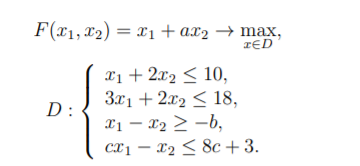

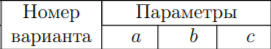


### Вариант 18 - значения
* F(x1,x2) = x1 + 3*x2
* A = x1 + 2x2 <= 10
* B = 3x1 + 2x2 <= 18
* C = x1 - x2 >= -6
* D = 1 * x1 - x2 <= 11

### Выражаем x2
* F(x2) = (F - x1) / 3
* A(x2) = (10 - x1) / 2
* B(x2) = (18 - 3 * x1) / 2
* C(x2) = x1 + 6
* D(x2) = x1 - 11

In [3]:
x1 = np.linspace(-10, 20, 30, dtype='int')
A = (10 - x1) / 2
B = (18 - 3 * x1) / 2
C = x1 + 6
D = x1 - 11

### Первым шагом решаю задачу максимизации

In [4]:
model = LpProblem(name="resource-allocation", sense = LpMaximize)
model

resource-allocation:
MAXIMIZE
None
VARIABLES

### Затем определяю переменные решения

In [5]:
x1 = LpVariable(name="x1")
x2 = LpVariable(name="x2")

### Задаю ограничения для модели

In [6]:
A_constraint = x1 + 2 * x2 <= 10
B_constraint = 3 * x1 + 2 * x2 <= 18
C_constraint = x1 - x2 >= -6
D_constraint = 1 * x1 - x2 <= 11
obj = x1 + 3 * x2

model += (A_constraint, "A")
model += (B_constraint, "B")
model += (C_constraint, "C")
model += (D_constraint, "D")
model += (obj)
model

resource-allocation:
MAXIMIZE
1*x1 + 3*x2 + 0
SUBJECT TO
A: x1 + 2 x2 <= 10

B: 3 x1 + 2 x2 <= 18

C: x1 - x2 >= -6

D: x1 - x2 <= 11

VARIABLES
x1 free Continuous
x2 free Continuous

### Задача максимизации

In [7]:
status = model.solve()

In [8]:
print(f"Статус решения: {model.status}, {LpStatus[model.status]}")
F = model.objective.value()
print(f"Оптимальное значение целевой функции: {int(F)}")

x1_total, x2_total = 0, 0
x1_total = model.variables()[0].value()
x2_total = model.variables()[1].value()

print(f"Оптимальный план: (x1 = {int(x1_total)}, x2 = {int(x2_total)})")

Статус решения: 1, Optimal
Оптимальное значение целевой функции: 15
Оптимальный план: (x1 = 0, x2 = 5)


### Геометрический метод решения ЗЛП

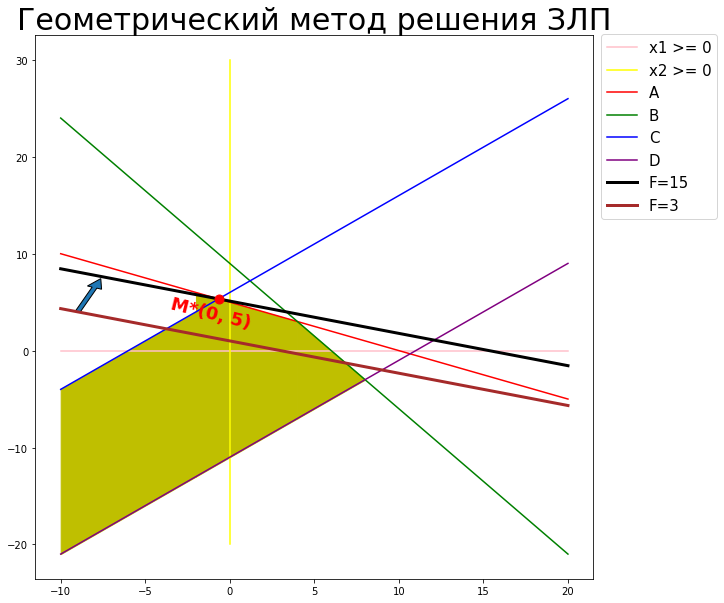

In [9]:
x1 = np.linspace(-10, 20, 30, dtype="int")

x_axis = np.linspace(0, 0, 30, dtype='int')
y_axis = np.linspace(30, -20, 30, dtype='int')

plt.figure(figsize=(10, 10))

plt.plot(x1, x_axis, color='pink', label='x1 >= 0')
plt.plot(x_axis, y_axis, color='yellow', label='x2 >= 0')

plt.plot(x1, A, color='red', label='A')

plt.plot(x1, B, color='green', label='B')

plt.plot(x1, C, color='blue', label='C')

plt.plot(x1, D, color='purple', label='D')



n = 9 
m = 15
k = 19

plt.fill_between(x1[:n], D[:n], C[:n], color='y')
plt.fill_between(x1[n-1:m], A[n-1:m], D[n-1:m], color='y')
plt.fill_between(x1[m-1:k], B[m-1:k], D[m-1:k], color='y')

plt.text(x1_total + 2,x2_total -3,f'M*({int(x1_total)}, {int(x2_total)})',horizontalalignment='right', color="red"
         , rotation=-14, fontsize=18, fontweight="bold")

x_total_graph = (F - x1) / 3

plt.plot(x1, x_total_graph, color='black', label='F=15', linewidth=3)

F_test = 3
x_test_graph = (F_test - x1) / 3

plt.plot(x1, x_test_graph, color='brown', label='F=3', linewidth=3)

plt.legend(bbox_to_anchor=(1, 1.01525), fontsize=15)

plt.arrow(-9, 4, 1,2.5,
         width = 0.3,
         head_length = 1)

plt.plot(x1_total, x2_total, marker="o", markersize=9, markeredgecolor="red", markerfacecolor="red")
plt.title("Геометрический метод решения ЗЛП",fontsize=30)
plt.show()